### Practice
Implement the K-Nearest Neighbors (KNN) model using a different dataset.

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [8]:
df = pd.read_csv("Iris_flowers.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
#I removed the repeated sequence number
df = df.drop('Id', axis=1) 
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [55]:
# I printed the unique values in the 'Species' column for classification
unique_species = df['Species'].unique()
print("Unique Species Values:")
for species in unique_species:
    print(species)

Unique Species Values:
Iris-setosa
Iris-versicolor
Iris-virginica


In [11]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

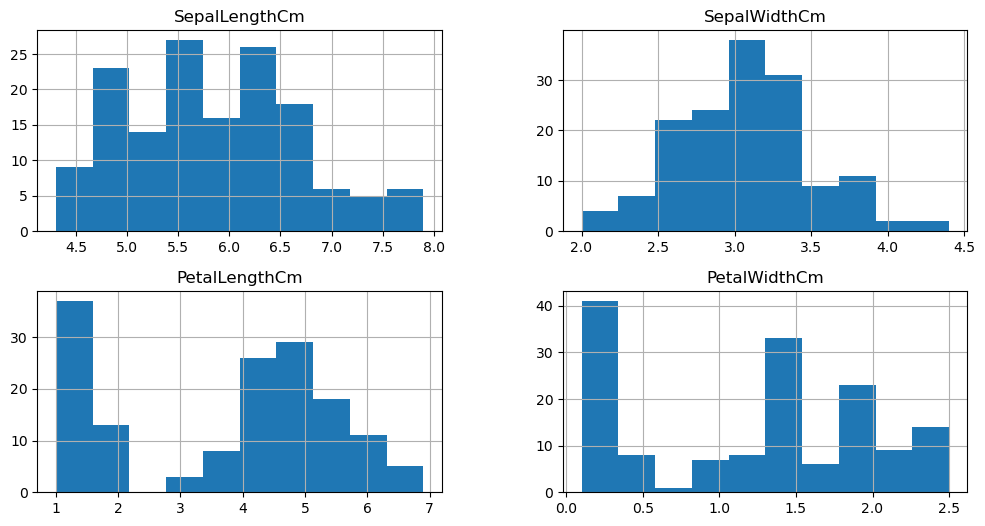

In [15]:
plt.rcParams['figure.figsize'] = (12,6)

viz = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
viz.hist()
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

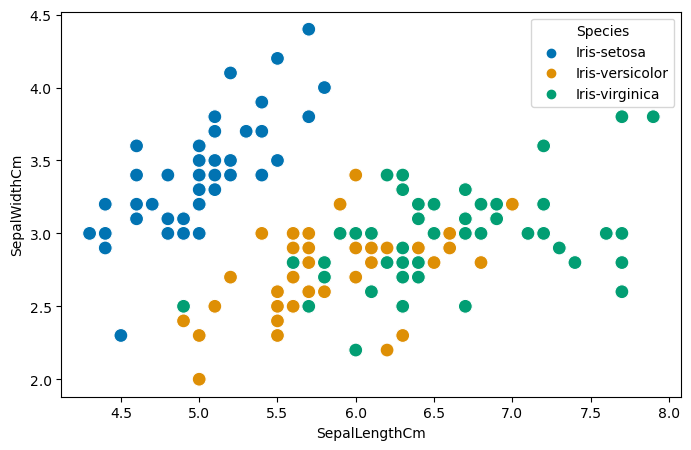

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species', data=df,palette='colorblind',s=100)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

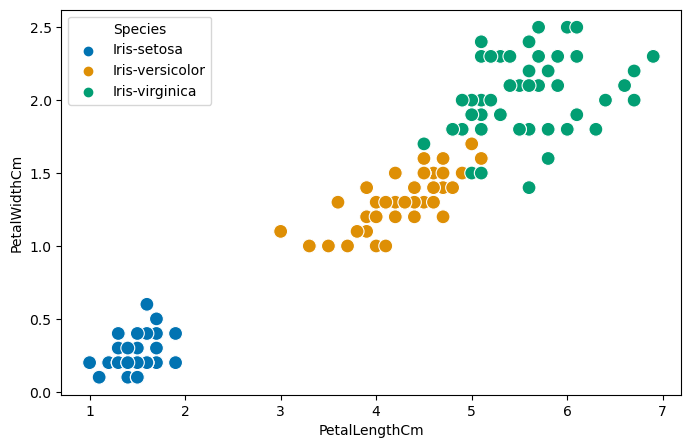

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species', data=df,palette='colorblind',s=100)

In [35]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# StandardScaler for normalization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separating the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
k = 5#can be modified to suit the ideal result
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# calculation of truth value
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


The obtained accuracy level seems to be at a probability that we might not encounter in real-life scenarios. Hence, I wanted to delve deeper into the result. To achieve this, I conducted K-fold cross-validation, allowing me to assess the accuracy of the model more comprehensively

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create an example model (for instance, KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Dataset and target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Perform K-fold cross-validation using cross_val_score
scores = cross_val_score(knn, X, y, cv=5)  # Here, cv parameter denotes the number of folds, set to 5 here

# Print obtained scores
for score in scores:
    print(f"Cross-Validation Score: {score:.3f}")


Cross-Validation Score: 0.967
Cross-Validation Score: 1.000
Cross-Validation Score: 0.933
Cross-Validation Score: 0.967
Cross-Validation Score: 1.000


In [36]:
from sklearn import metrics
import numpy as np
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [37]:
mean_acc

array([0.9       , 0.93333333, 0.9       , 0.95      , 0.91666667,
       0.91666667, 0.93333333, 0.91666667, 0.91666667])

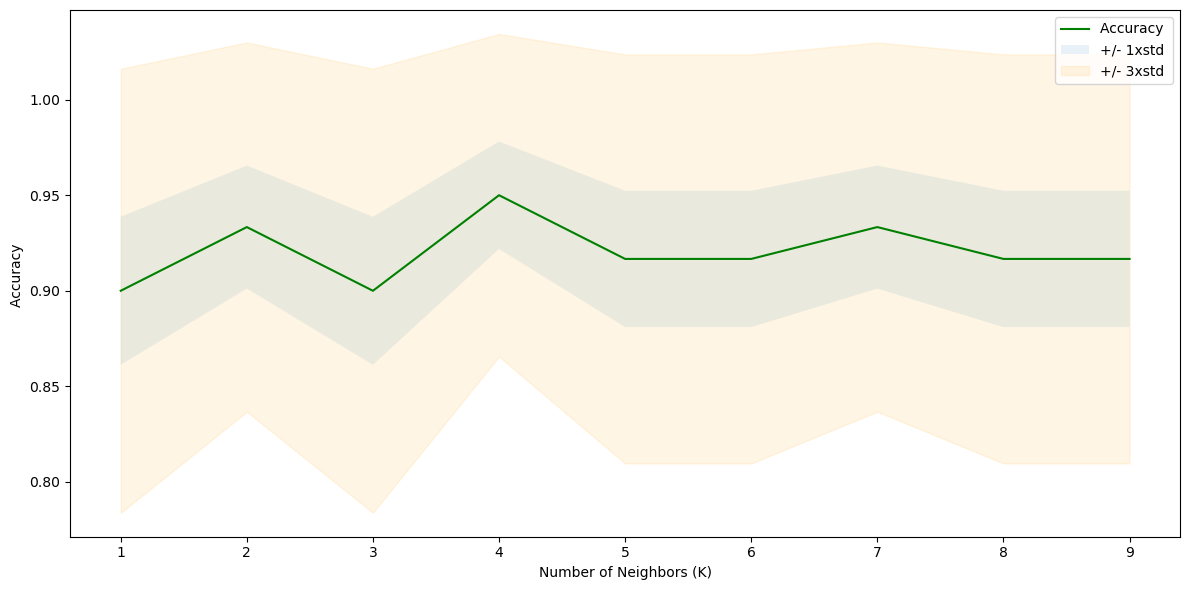

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="orange")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

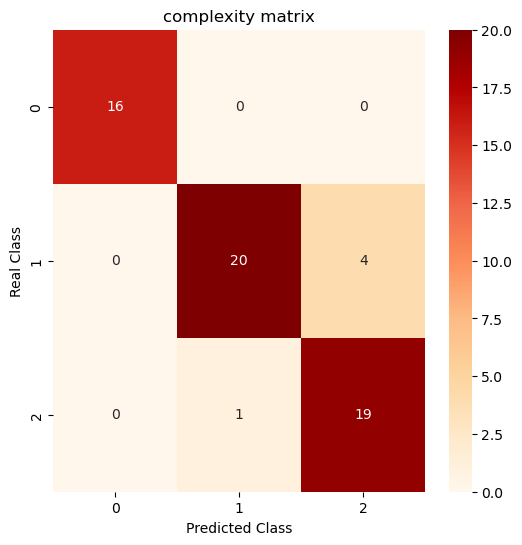

In [54]:
# Creating a complexity matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.title('complexity matrix')
plt.show()
